In [1]:
import csv
import random
import math
import numpy as np 
import operator
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import style
import re
import seaborn as sns
from scipy import optimize as op
%matplotlib inline

# Part 1

In [2]:
def split_dataset(data,val):
    X = data.loc[1:, data.columns != val]
    Y = data.loc[1:, val]
    X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size = 0.25,shuffle=True)
    return X, Y, X_train, X_test, Y_train, Y_test

In [3]:
class KNN():
    def predict(self, inputs, k, fl):
        predictions = []
        for i in range(len(inputs)):
            row = inputs[i]
            label = self.closest(row, k, fl)
            predictions.append(label)
        return predictions

    def fit(self, X_train, Y_train):
        self.Y_train = Y_train
        self.X_train = X_train
    
    def euclid_dist(self, x, y):
        return distance.euclidean(x,y)
    
    def manhattan_dist(self, x, y):
        return distance.cityblock(x,y)
    
    def cosine_dist(self, x, y):
        return distance.cosine(x,y)
    

    def closest(self, row, k, fl):
        dists = []
        l1 = len(self.X_train)
        if fl == 1:
            for i in range(l1):
                dists.append((i,self.euclid_dist(self.X_train[i],row)))
        elif fl == 2:
            for i in range(l1):
                dists.append((i,self.manhattan_dist(self.X_train[i],row)))
        else:
            for i in range(l1):
                dists.append((i,self.cosine_dist(self.X_train[i],row)))
        k_labels = []
        dists = sorted(dists, key=lambda x:x[1])[0:k]
        for i in range(k):
            val = self.Y_train[dists[i][0]]
            k_labels.append(val)
        c = Counter(k_labels)
        return c.most_common()[0][0]

In [4]:
data = pd.read_csv("Iris/iris.csv", sep= ',', header = None)
X, Y, X_train, X_test, Y_train, Y_test = split_dataset(data,4)
classifier = KNN()
X_train = np.asarray(X_train.values)
Y_train = np.asarray(Y_train.values)
X_test = np.asarray(X_test.values)
Y_test = np.asarray(Y_test.values)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test, 3,1)

In [5]:
recall = recall_score(Y_test, predictions, average='macro')
precision = precision_score(Y_test, predictions, average='macro')
accuracy = accuracy_score(Y_test, predictions)
f1Score = f1_score(Y_test, predictions, average='macro')
print("Recall   :",recall)
print("Precison :",precision)
print("Accuracy :",accuracy)
print("F1 Score :",f1Score)

Recall   : 0.9761904761904763
Precison : 0.9722222222222222
Accuracy : 0.9705882352941176
F1 Score : 0.9731615673644659


### Using Euclidean Distance

Text(0.5, 1.0, 'Accuracy vs K')

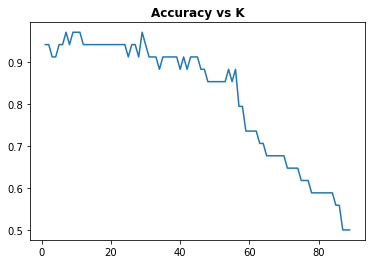

In [68]:
var_k = []
k_val = []
for k in range(1,90):
    predictions = classifier.predict(X_test, k, 1)
    accuracy = accuracy_score(Y_test, predictions)
    var_k.append(accuracy)
    k_val.append(k)
plt.plot(k_val, var_k)
plt.title("Accuracy vs K",fontweight="bold")

### Using Manhattan Distance

Text(0.5, 1.0, 'Accuracy vs K')

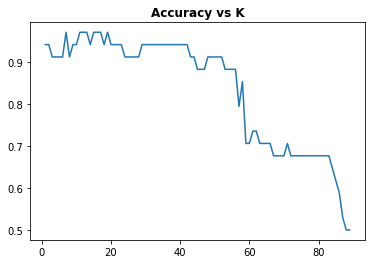

In [69]:
var_k = []
k_val = []
for k in range(1,90):
    predictions = classifier.predict(X_test, k, 2)
    accuracy = accuracy_score(Y_test, predictions)
    var_k.append(accuracy)
    k_val.append(k)
plt.plot(k_val, var_k)
plt.title("Accuracy vs K",fontweight="bold")

### Using cosine similarity

Text(0.5, 1.0, 'Accuracy vs K')

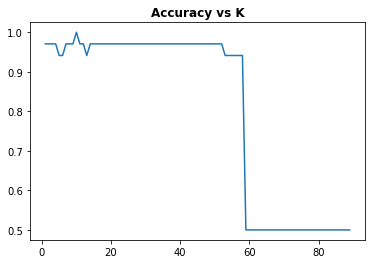

In [70]:
var_k = []
k_val = []
for k in range(1,90):
    predictions = classifier.predict(X_test, k, 3)
    accuracy = accuracy_score(Y_test, predictions)
    var_k.append(accuracy)
    k_val.append(k)
plt.plot(k_val, var_k)
plt.title("Accuracy vs K",fontweight="bold")

In [6]:
data = pd.read_csv("RobotDataset/Robot1", delimiter=r"\s+", header = None,usecols=[0,1,2,3,4,5,6])
X, Y, X_train, X_test, Y_train, Y_test = split_dataset(data,0)
classifier = KNN()
X_train = np.asarray(X_train.values)
Y_train = np.asarray(Y_train.values)
X_test = np.asarray(X_test.values)
Y_test = np.asarray(Y_test.values)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test, 3, 1)
recall = recall_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)
f1Score = f1_score(Y_test, predictions)
print("Recall   :",recall)
print("Precison :",precision)
print("Accuracy :",accuracy)
print("F1 Score :",f1Score)

Recall   : 0.6923076923076923
Precison : 0.75
Accuracy : 0.7741935483870968
F1 Score : 0.7199999999999999


Text(0.5, 1.0, 'Accuracy vs K')

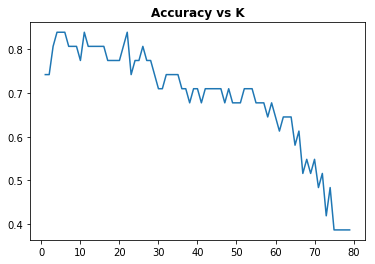

In [72]:
var_k = []
k_val = []
for k in range(1,80):
    predictions = classifier.predict(X_test, k, 1)
    accuracy = accuracy_score(Y_test, predictions)
    var_k.append(accuracy)
    k_val.append(k)
plt.plot(k_val, var_k)
plt.title("Accuracy vs K",fontweight="bold")

In [7]:
data = pd.read_csv("RobotDataset/Robot2", delimiter=r"\s+", header = None,usecols=[0,1,2,3,4,5,6])
X, Y, X_train, X_test, Y_train, Y_test = split_dataset(data,0)
classifier = KNN()
X_train = np.asarray(X_train.values)
Y_train = np.asarray(Y_train.values)
X_test = np.asarray(X_test.values)
Y_test = np.asarray(Y_test.values)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test, 3, 1)
recall = recall_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)
f1Score = f1_score(Y_test, predictions)
print("Recall   :",recall)
print("Precison :",precision)
print("Accuracy :",accuracy)
print("F1 Score :",f1Score)

Recall   : 0.9090909090909091
Precison : 0.7692307692307693
Accuracy : 0.8709677419354839
F1 Score : 0.8333333333333333


Text(0.5, 1.0, 'Accuracy vs K')

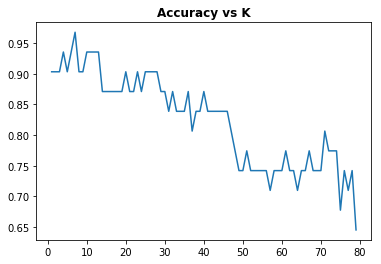

In [78]:
var_k = []
k_val = []
for k in range(1,80):
    predictions = classifier.predict(X_test, k, 1)
    accuracy = accuracy_score(Y_test, predictions)
    var_k.append(accuracy)
    k_val.append(k)
plt.plot(k_val, var_k)
plt.title("Accuracy vs K",fontweight="bold")

#### We can normalize the data according to gaussian distribution for better performance

# Part 2

In [8]:
data = pd.read_csv("LoanDataset/data.csv", sep= ',', header = None,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13])
data = data.iloc[1:]
data.columns = ['a', 'b','c','d','e','f','g','h','i','j','k','l','m']
data = data[['a', 'b', 'c', 'd','e','f','g','h','j','k','l','m','i']]
data = np.asarray(data)

In [9]:
def splitDataset(dataset, spl):
    l1 = len(dataset)
    trainSize = int(l1 * spl)
    copy = list(dataset)
    trainSet = []
    while True:
        if len(trainSet) >= trainSize:
            break
        l2 = len(copy)
        id1 = random.randrange(l2)
        trainSet.append(copy.pop(id1))
    return [trainSet, copy]

In [10]:
def separateByClass(dataset):
    separated = {}
    l1 = len(dataset)
    i = 0
    while i < l1:
        vc = dataset[i]
        val = vc[-1]
        if (val not in separated):
            separated[val] = []
        separated[val].append(vc)
        i = i + 1
    return separated

In [11]:
def mean(numbers):
    sum1 = sum(numbers)
    num1 = float(len(numbers))
    return sum1/num1

In [12]:
def stdev(numbers):
    avg = mean(numbers)
    l1 = len(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])
    variance = variance / float(l1-1)
    standardDev = math.sqrt(variance) 
    return standardDev

In [13]:
def summarize(dataset):
    summaries = []
    for attribute in zip(*dataset) :
        summaries.append((mean(attribute), stdev(attribute))) 
    del summaries[-1]
    return summaries

In [14]:
def summarizeByClass(dataset):
    summaries = {}
    separated = separateByClass(dataset)
    for classValue, instances in separated.items():
        summry = summarize(instances)
        summaries[classValue] = summry
    return summaries

In [15]:
def calculateProbability(x, mean, stdev):
    expr = -(math.pow(x-mean,2)/(2*math.pow(stdev,2)))
    exponent = math.exp(expr)
    probl = (1 / (math.sqrt(2 * math.pi ) * stdev)) * exponent
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent

In [16]:
def calculateClassProbabilities(summaries, inputVector, p0, p1, probs0, probs1, probs0_edu, probs1_edu):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        j = 0
        if classValue == 0:
            probabilities[classValue] = p0
        else:
            probabilities[classValue] = p1
        for i in range(len(classSummaries)):
            if i == 6 :
                x = inputVector[i]
                if x == 1 and classValue == 1:
                    probabilities[classValue] *= probs1_edu[0]
                if x == 2 and classValue == 1:
                    probabilities[classValue] *= probs1_edu[1]
                if x == 3 and classValue == 1:
                    probabilities[classValue] *= probs1_edu[2]
                if x == 1 and classValue == 0:
                    probabilities[classValue] *= probs0_edu[0]
                if x == 2 and classValue == 0:
                    probabilities[classValue] *= probs0_edu[1]
                if x == 3 and classValue == 0:
                    probabilities[classValue] *= probs0_edu[2]
            elif i >= 8 :
                x = inputVector[i]
                if x == 0 and classValue == 0:
                    probabilities[classValue] *= (1 - probs0[j])
                if x == 0 and classValue == 1:
                    probabilities[classValue] *= (1 - probs1[j])
                if x == 1 and classValue == 0:
                    probabilities[classValue] *= (probs0[j])
                if x == 1 and classValue == 1:
                    probabilities[classValue] *= (probs1[j])
                j = j + 1
            else :
                x = inputVector[i]
                mean = classSummaries[i][0]
                stdev = classSummaries[i][1]
                probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [17]:
def predict(summaries, inputVector, p0, p1, probs0, probs1, probs0_edu, probs1_edu):
    bestProb = -1
    bestLabel = None
    probabilities = calculateClassProbabilities(summaries, inputVector, p0, p1, probs0, probs1, probs0_edu, probs1_edu)
    for classValue, probability in probabilities.items():
        if bestLabel is None:
            bestLabel = classValue
            bestProb = probability
        elif probability > bestProb:
            bestLabel = classValue
            bestProb = probability
    return bestLabel

In [18]:
def getPredictions(summaries, testSet, p0, p1, probs0, probs1, probs0_edu, probs1_edu):
    predictions = []
    l1 = len(testSet)
    for i in range(l1):
        result = predict(summaries, testSet[i], p0, p1, probs0, probs1, probs0_edu, probs1_edu)
        predictions.append(result)
    return predictions

In [20]:
splitRatio = 0.67
dataset = data
p0 = 0 
p1 = 0
trainingSet, testSet = splitDataset(dataset, splitRatio)

l1 = len(trainingSet)
for i in range(len(trainingSet)):
    if trainingSet[i][-1] == 0:
        p0 = p0 + 1
    else:
        p1 = p1 + 1
        
yes = p1
no = p0
p0 = p0 / l1
p1 = p1 / l1
probs0 = []
probs1 = []
probs0_edu = []
probs1_edu = []
for i in range(8,12):
    pt0 = 0
    pt1 = 0
    for j in range(len(trainingSet)):
        if trainingSet[j][i] == 1 and trainingSet[j][-1] == 1:
            pt1 = pt1 + 1
        if trainingSet[j][i] == 1 and trainingSet[j][-1] == 0:
            pt0 = pt0 + 1
    pt1 = pt1 / yes
    pt0 = pt0 / no
    probs0.append(pt0)
    probs1.append(pt1)

for i in range(6,7):
    pt1 = 0
    pt2 = 0
    pt3 = 0
    for j in range(len(trainingSet)):
        if trainingSet[j][i] == 1 and trainingSet[j][-1] == 1:
            pt1 = pt1 + 1
        if trainingSet[j][i] == 2 and trainingSet[j][-1] == 1:
            pt2 = pt2 + 1
        if trainingSet[j][i] == 3 and trainingSet[j][-1] == 1:
            pt3 = pt3 + 1
    pt1 = pt1 / yes
    pt2 = pt2 / yes
    pt3 = pt3 / yes
    probs1_edu.append(pt1)
    probs1_edu.append(pt2)
    probs1_edu.append(pt3)
    
    pt1 = 0
    pt2 = 0
    pt3 = 0
    
    for j in range(len(trainingSet)):
        if trainingSet[j][i] == 1 and trainingSet[j][-1] == 0:
            pt1 = pt1 + 1
        if trainingSet[j][i] == 2 and trainingSet[j][-1] == 0:
            pt2 = pt2 + 1
        if trainingSet[j][i] == 3 and trainingSet[j][-1] == 0:
            pt3 = pt3 + 1
    pt1 = pt1 / no
    pt2 = pt2 / no
    pt3 = pt3 / no
    probs0_edu.append(pt1)
    probs0_edu.append(pt2)
    probs0_edu.append(pt3)

summaries = summarizeByClass(trainingSet)
predictions = getPredictions(summaries, testSet, p0, p1, probs0, probs1, probs0_edu, probs1_edu)
lt = len(testSet)
accuracy = 0
j = 0
for row in testSet:
    if row[-1] == predictions[j]:
        accuracy = accuracy + 1
    j = j + 1
accuracy = accuracy / float(lt) * 100

print('Accuracy: {0}%'.format(accuracy))


Accuracy: 90.7070707070707%


#### We can see from the above that the accuracy is around 90%. For numerical attributes I have calculated the probability using gaussian distribution

# Part 3

In [21]:
df = pd.read_csv("AdmissionDataset/data.csv")
colnames = ['CGPA','Research']

In [22]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col],df["Chance of Admit "],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

2


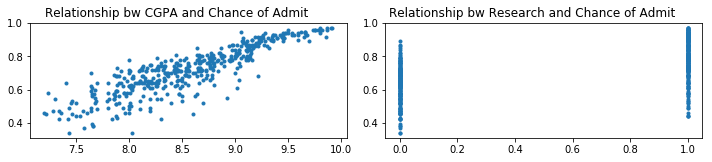

In [144]:
plotFeatures(colnames,"Relationship bw %s and Chance of Admit      ")

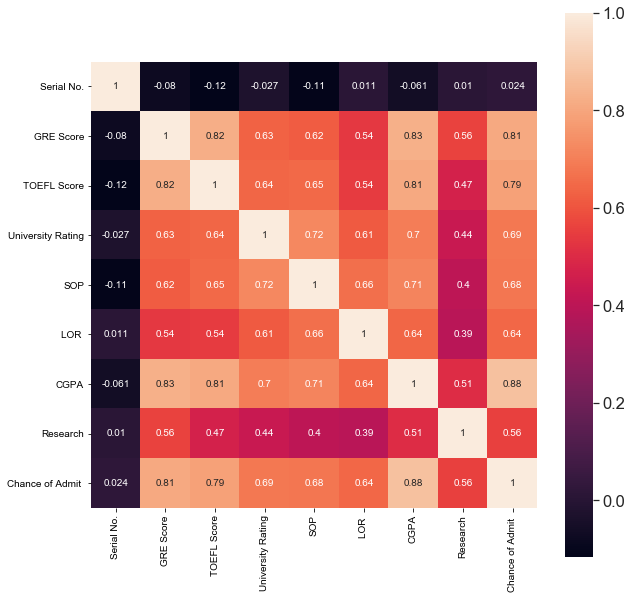

In [145]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()
df.drop(columns={'Serial No.'}, inplace=True)

## Using Gradient Descent

In [37]:
def calculateCost(x,theta,Y):
    prediction = np.dot(x,theta)
    return ((prediction - Y)**2).mean()/2

In [38]:
def mae(x,theta,Y):
    prediction = np.dot(x,theta)
    return (abs(prediction - Y)).mean()

In [39]:
def mape(x,theta,Y):
    prediction = np.dot(x,theta)
    return np.mean(np.abs((Y - prediction) / Y)) * 100

In [40]:
def mse(x,theta,Y):
    prediction = np.dot(x,theta)
    return ((prediction - Y)**2).mean()

Iteration: 1,Cost = 0.21124413103955147,theta = [0.0181114  0.15721746]


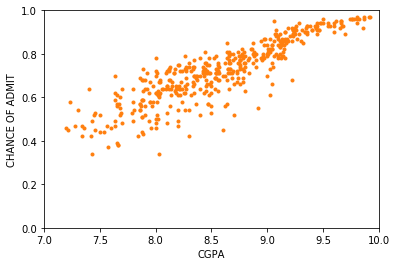

Iteration: 20001,Cost = 0.0023111975729542358,theta = [-0.95899251  0.19589879]


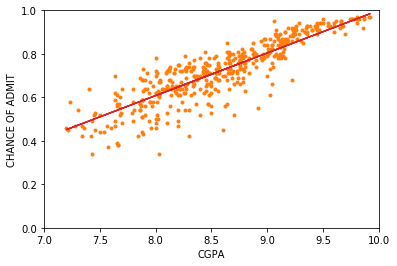

Iteration: 40001,Cost = 0.0022889644194922297,theta = [-1.04645823  0.20604699]


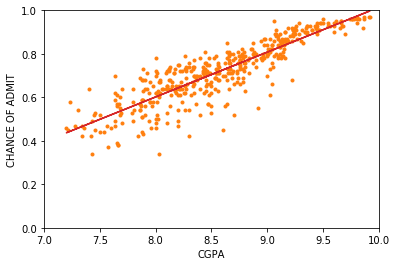

Iteration: 60001,Cost = 0.0022887831062251246,theta = [-1.05435686  0.20696343]


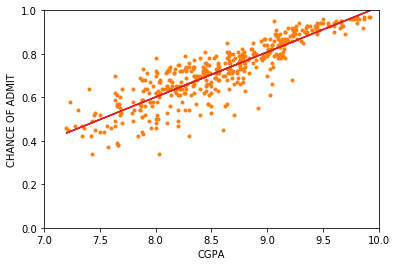

Iteration: 80001,Cost = 0.0022887816275999327,theta = [-1.05507015  0.20704619]


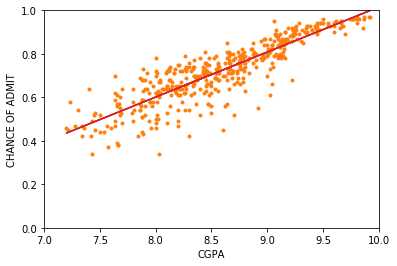

In [31]:
def grad_desc(alpha, iterations):
    predictor = df["CGPA"]
    l1 = len(predictor)
    theta0 = []
    theta1 = []
    x = np.column_stack((np.ones(l1),predictor))
    Y = df["Chance of Admit "]
    theta = np.zeros(2)
    for i in range(iterations):
        pred = np.dot(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        theta = np.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        if i%20000 == 0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            y_vals = np.dot(x,theta)
            plt.xlim(7, 10)
            plt.xlabel('CGPA')
            plt.ylabel('CHANCE OF ADMIT')
            plt.ylim(0, 1)
            plt.plot(x,Y,'.',x, y_vals, '-')
            plt.show()
grad_desc(0.0251237, 100000)

## Using Normal Equation

In [41]:
my_data = pd.read_csv("AdmissionDataset/data.csv")
my_data.drop(columns={'Serial No.'}, inplace=True)
X = my_data.iloc[:,0:7]
ones = np.ones([X.shape[0],1])
X_b = np.concatenate((ones,X),axis=1)
y = my_data.iloc[:,7:8]
y = np.asarray(y)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Cost            : ",calculateCost(X_b,theta_best,y))
print("Cost Using MSE  : ",mse(X_b,theta_best,y))
print("Cost Using MAE  : ",mae(X_b,theta_best,y))
print('Cost Using MAPE :  {0}%'.format(mape(X_b,theta_best,y)))

Cost            :  0.0018225819648681298
Cost Using MSE  :  0.0036451639297362596
Cost Using MAE  :  0.043148556063183324
Cost Using MAPE :  6.947267003384527%


## Coefficients

In [42]:
print(theta_best)

[[-1.28832972]
 [ 0.00194069]
 [ 0.00284917]
 [ 0.00682386]
 [ 0.00138978]
 [ 0.01583202]
 [ 0.11583813]
 [ 0.02719106]]
